### Generates figure 2A,B,C


In [8]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes
import os

from scripts.analysis_helper_functions.helper_functions_SBML_analysis import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches



/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [9]:
# model information (number of parameters and state variables)
n_parameter = {
    "Borghans_BiophysChem1997": 24,
    "Beer_MolBioSystems2014": 12,
    "Brannmark_JBC2010": 18,
    "Zheng_PNAS2012": 62,
    "mosbacher2022_mixed_Hog1_phosphorylation_l2v4": 280,
    "Isensee_JCB2018": 63,
    "Hass_PONE2017": 37,
    "Palani2011": 15,
    "Sneyd_PNAS2002": 16,
    "Kinetic_glycolysis_assay_model": 13,
    "Fujita_SciSignal2010": 26,
    "Messiha2013": 192,
    "Raia_CancerResearch": 45,
    "Weber_BMC2015": 53,
    "Crauste_CellSystems2017": 16,
    "Fiedler_BMC2016": 24,
    "Smallbone2013_SerineBiosynthesis": 10,
    "Bruno_JExpBio2016": 10,
    "Becker_Science2010": 17,
    "Ray2013": 20,
    "Chassagnole2002": 117,
    "Bertozzi2020": 36,
    "Schwen_PONE2014": 19,
    "Garde2020": 6,
    "Smallbone2011_TrehaloseBiosynthesis": 52,
    "Elowitz_Nature2000": 22,
}

n_state_variables = {
    "Borghans_BiophysChem1997": 3,
    "Beer_MolBioSystems2014": 4,
    "Brannmark_JBC2010": 9,
    "Zheng_PNAS2012": 15,
    "mosbacher2022_mixed_Hog1_phosphorylation_l2v4": 95,
    "Isensee_JCB2018": 25,
    "Hass_PONE2017": 9,
    "Palani2011": 5,
    "Sneyd_PNAS2002": 6,
    "Kinetic_glycolysis_assay_model": 12,
    "Fujita_SciSignal2010": 26,
    "Messiha2013": 28,
    "Raia_CancerResearch": 14,
    "Weber_BMC2015": 7,
    "Crauste_CellSystems2017": 5,
    "Fiedler_BMC2016": 6,
    "Smallbone2013_SerineBiosynthesis": 2,
    "Bruno_JExpBio2016": 6,
    "Becker_Science2010": 6,
    "Ray2013": 6,
    "Chassagnole2002": 36,
    "Bertozzi2020": 3,
    "Schwen_PONE2014": 11,
    "Garde2020": 6,
    "Smallbone2011_TrehaloseBiosynthesis": 6,
    "Elowitz_Nature2000": 8,
}

literature_names = {
    "Borghans_BiophysChem1997": "Borghans et. al (1997)",
    "Beer_MolBioSystems2014": "Beer et. al (2014)",
    "Brannmark_JBC2010": "Brannmark et. al (2010)",
    "Zheng_PNAS2012": "Zheng et. al (2012)",
    "mosbacher2022_mixed_Hog1_phosphorylation_l2v4": "Mosbacher et. al (2023)",
    "Isensee_JCB2018": "Isensee et. al (2018)",
    "Hass_PONE2017": "Hass et. al (2017)",
    "Palani2011": "Palani et. al (2011)",
    "Sneyd_PNAS2002": "Sneyd et. al (2002)",
    "Kinetic_glycolysis_assay_model": "Nitin et. al (2013)",
    "Fujita_SciSignal2010": "Fujita et. al (2010)",
    "Messiha2013": "Messiha et. al (2014)",
    "Raia_CancerResearch": "Raia et. al (2011)",
    "Weber_BMC2015": "Weber et. al (2015)",
    "Crauste_CellSystems2017": "Crauste et. al (2017)",
    "Fiedler_BMC2016": "Fiedler et. al (2016)",
    "Smallbone2013_SerineBiosynthesis": "Smallbone et. al (2013)",
    "Bruno_JExpBio2016": "Bruno et. al (2016)",
    "Becker_Science2010": "Becker et. al (2010)",
    "Ray2013": "Ray et. al (2013)",
    "Chassagnole2002": "Chassagnole et. al (2002)",
    "Bertozzi2020": "Bertozzi et. al (2020)",
    "Schwen_PONE2014": "Schwen et. al (2015)",
    "Garde2020": "Garde et. al (2020)",
    "Smallbone2011_TrehaloseBiosynthesis": "Smallbone et. al (2011)",
    "Elowitz_Nature2000": "Elowitz et. al (2000)",
}

In [10]:
# load the loss dataframes, params_dfs, and norms_dfs
model_names = os.listdir("results/EXP1_initialization_bounds_lhs_V2")


models_loss_dfs = {}
for model_name in model_names:
    results_dir = "results/EXP1_initialization_bounds_lhs_V2/" + model_name + "/"
    file_list = os.listdir(results_dir)
    loss_dfs, params_dfs, norms_dfs = retrieve_convergence_results(results_dir, file_list)

    # save models in another dictionary so that we can easily retrieve them for downstream analysis
    models_loss_dfs[model_name] = loss_dfs

In [45]:
# investigating single models for different bounds and their performance in loss.
run_names = ["run_1", "run_2", "run_3"]
bound_names = ["bounds_2", "bounds_5", "bounds_10", "bounds_50", "bounds_100"]

model_name_id = "Messiha2013"

loss_dfs = models_loss_dfs[model_name_id]
percentage_per_bound = {}
for bound_name in bound_names:
    percentage_below_threshold = []
    for run_name in run_names:
        try:
            loss_dictionary_key = f"{model_name_id}_losses_id_lhs_N=100{run_name}{bound_name}.csv"

            loss_df_model = models_loss_dfs[model_name_id][loss_dictionary_key]

            thresholds = np.linspace(1e-6, 1, 100)

            percentage_per_thresh = []
            for threshold in thresholds:
                count_below_threshold = 0
                for col in range(np.shape(loss_df_model)[1]):
                    init_loss_df = np.array(loss_df_model.iloc[:, col].dropna().values)
                    # print(np.where(init_loss_df<threshold)[0])
                    if np.abs(init_loss_df[-1]) < threshold:
                        count_below_threshold += 1

                percentage_per_thresh.append(count_below_threshold)
            percentage_below_threshold.append(percentage_per_thresh)
        except:
            continue
    percentage_below_threshold = np.mean(np.array(percentage_below_threshold), axis=0)
    percentage_per_bound[bound_name] = percentage_below_threshold

Text(0, 0.5, 'Percentage (in %)')

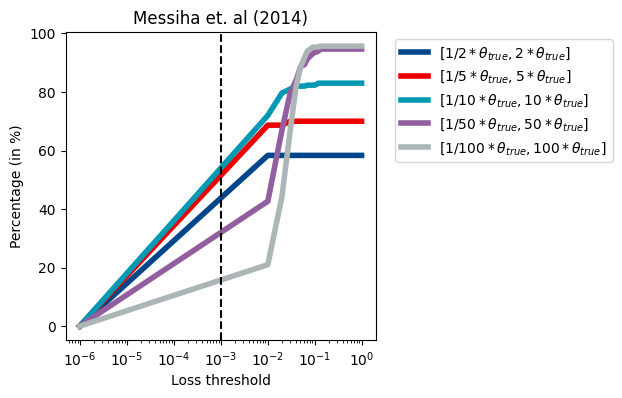

In [46]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(
    thresholds, percentage_per_bound["bounds_2"], label="[$1/2*\\theta_{true},2*\\theta_{true}]$", linewidth=4, c="#00468BFF"
)
ax.plot(
    thresholds, percentage_per_bound["bounds_5"], label="[$1/5*\\theta_{true},5*\\theta_{true}]$", linewidth=4, c="#ED0000FF"
)
ax.plot(
    thresholds,
    percentage_per_bound["bounds_10"],
    label="[$1/10*\\theta_{true},10*\\theta_{true}]$",
    linewidth=4,
    c="#0099B4FF",
)
ax.plot(
    thresholds,
    percentage_per_bound["bounds_50"],
    label="[$1/50*\\theta_{true},50*\\theta_{true}]$",
    linewidth=4,
    c="#925E9FFF",
)
ax.plot(
    thresholds,
    percentage_per_bound["bounds_100"],
    label="[$1/100*\\theta_{true},100*\\theta_{true}]$",
    linewidth=4,
    c="#ADB6B6FF",
)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_title(literature_names[model_name_id])
ax.axvline(1e-3, linestyle="--", c="black")
ax.set_xscale("log")

ax.set_xlabel("Loss threshold")
ax.set_ylabel("Percentage (in %)")
# fig.savefig("figures/threshold_plot_exp1/threshold_plots_onemodel_lbub.svg", bbox_inches="tight")
# fig.savefig("figures/threshold_plot_exp1/threshold_plots_onemodel_lbub.png", bbox_inches="tight")

In [47]:
# plot of all models for a specific bound (lets do 2 and ten?)
run_names = ["run_1", "run_2", "run_3"]
bound_name = "bounds_10"


model_selection = ["Garde2020", "Becker_Science2010", "Hass_PONE2017", "Weber_BMC2015", "Messiha2013"]
# model_selection=["Garde2020"]
percentage_per_model = {}
for model_name in model_selection:
    percentage_below_threshold = []
    for run_name in run_names:
        loss_dictionary_key = f"{model_name}_losses_id_lhs_N=100{run_name}{bound_name}.csv"

        loss_df_model = models_loss_dfs[model_name][loss_dictionary_key]

        thresholds = np.linspace(1e-6, 1, 100)

        percentage_per_thresh = []
        for threshold in thresholds:
            count_below_threshold = 0

            for col in range(np.shape(loss_df_model)[1]):
                init_loss_df = np.array(loss_df_model.iloc[:, col].dropna().values)
                # print(np.where(init_loss_df<threshold)[0])
                if np.abs(init_loss_df[-1]) < threshold:

                    count_below_threshold += 1
            percentage_per_thresh.append(count_below_threshold)
        percentage_below_threshold.append(percentage_per_thresh)

    percentage_below_threshold = np.mean(np.array(percentage_below_threshold), axis=0)
    percentage_per_model[model_name] = percentage_below_threshold

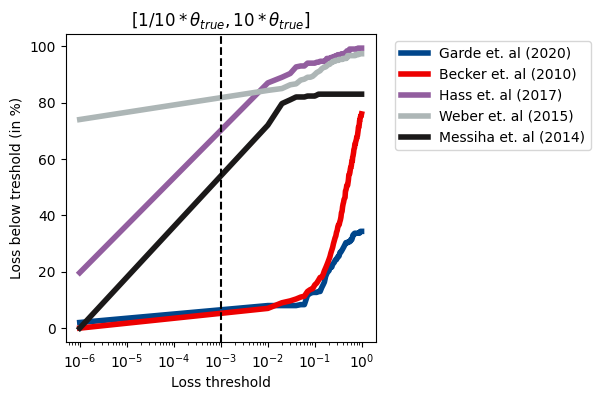

In [49]:
fig, ax = plt.subplots(figsize=(4, 4))
mkeys = ["Garde2020", "Becker_Science2010", "Hass_PONE2017", "Weber_BMC2015", "Messiha2013"]
c = ["#00468BFF", "#ED0000FF", "#925E9FFF", "#ADB6B6FF", "#1B1919FF"]
for i, m_key in enumerate(mkeys):
    ax.plot(thresholds, percentage_per_model[m_key], label=literature_names[m_key], linewidth=4, c=c[i])
# ax.plot(thresholds,percentage_per_bound["bounds_5"],label="[$1/5*\\theta_{true},5*\\theta_{true}]$")
# ax.plot(thresholds,percentage_per_bound["bounds_10"],label="[$1/10*\\theta_{true},10*\\theta_{true}]$")
# ax.plot(thresholds,percentage_per_bound["bounds_50"],label="[$1/50*\\theta_{true},50*\\theta_{true}]$")
# ax.plot(thresholds,percentage_per_bound["bounds_100"],label="[$1/100*\\theta_{true},100*\\theta_{true}]$")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# ax.set_title(literature_names[model_name_id])


ax.set_xscale("log")
ax.axvline(1e-3, linestyle="--", c="black")
ax.set_xlabel("Loss threshold")
ax.set_ylabel("Loss below treshold (in %)")
ax.set_title("[$1/10*\\theta_{true},10*\\theta_{true}]$")

fig.savefig("figures/threshold_plot_exp1/threshold_plots_five_models.svg", bbox_inches="tight")
fig.savefig("figures/threshold_plot_exp1/threshold_plots_five_models.png", bbox_inches="tight")

## Make the heatmaps, as well as diagonal heatmaps

In [15]:
# results directory
model_names = os.listdir("results/EXP1_initialization_bounds_lhs_V2")


models_loss_dfs = {}
for model_name in model_names:
    results_dir = "results/EXP1_initialization_bounds_lhs_V2/" + model_name + "/"
    file_list = os.listdir(results_dir)
    loss_dfs, params_dfs, norms_dfs = retrieve_convergence_results(results_dir, file_list)
    models_loss_dfs[model_name] = loss_dfs

In [38]:
run_names = ["run_1", "run_2", "run_3"]
bound_names = ["bounds_2", "bounds_5", "bounds_10", "bounds_50", "bounds_100"]


heatmap_array_init = np.zeros((len(model_names), len(bound_names)))
for i, model_name in enumerate(model_names):
    for k, bound_name in enumerate(bound_names):
        counts = []
        for run in run_names:
            try:
                loss_dictionary_key = f"{model_name}_losses_id_lhs_N=100{run}{bound_name}.csv"
                loss_df_model = models_loss_dfs[model_name][loss_dictionary_key]
                count_inits = 0
                for col in range(np.shape(loss_df_model)[1]):
                    loss_iter = loss_df_model.iloc[:, col].dropna().values
                    init_value = loss_iter[0]

                    if init_value != -1:
                        count_inits += 1
                counts.append(count_inits)
            except:
                avg_counts = 0
            avg_counts = np.mean(np.array(counts))
            heatmap_array_init[i, k] = avg_counts

heatmap_array_succes = np.zeros((len(model_names), len(bound_names)))
for i, model_name in enumerate(model_names):
    for k, bound_name in enumerate(bound_names):
        counts = []
        for run in run_names:
            try:
                loss_dictionary_key = f"{model_name}_losses_id_lhs_N=100{run}{bound_name}.csv"
                loss_df_model = models_loss_dfs[model_name][loss_dictionary_key]
                count_inits = 0
                for col in range(np.shape(loss_df_model)[1]):
                    loss_iter = loss_df_model.iloc[:, col].dropna().values
                    init_value = loss_iter[-1]

                    if np.abs(init_value) <= 1e-3:
                        count_inits += 1
                counts.append(count_inits)
            except:
                avg_counts = 0
            avg_counts = np.mean(np.array(counts))
            heatmap_array_succes[i, k] = avg_counts

heatmap_array_init = pd.DataFrame(heatmap_array_init, columns=bound_names, index=model_names).T
heatmap_array_succes = pd.DataFrame(heatmap_array_succes, columns=bound_names, index=model_names).T

/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes/venv/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [40]:
heatmap_array_succes

,Borghans_BiophysChem1997,Palani2011,Beer_MolBioSystems2014,Sneyd_PNAS2002,Isensee_JCB2018,mosbacher2022_mixed_Hog1_phosphorylation_l2v4,Kinetic_glycolysis_assay_model,Fujita_SciSignal2010,Messiha2013,Raia_CancerResearch,...,Bruno_JExpBio2016,Becker_Science2010,Ray2013,Hass_PONE2017,Chassagnole2002,Bertozzi2020,Schwen_PONE2014,Garde2020,Smallbone2011_TrehaloseBiosynthesis,Elowitz_Nature2000
bounds_2,0.0,21.666667,100.000000,100.000000,0.0,85.333333,100.000000,100.000000,57.666667,100.000000,...,100.0,99.333333,63.666667,100.000000,96.333333,100.000000,100.0,46.000000,100.000000,100.000000
bounds_5,0.0,0.666667,96.000000,100.000000,0.0,68.333333,92.666667,96.333333,56.666667,99.333333,...,100.0,19.666667,24.333333,91.333333,60.666667,65.000000,100.0,13.666667,98.000000,76.333333
bounds_10,0.0,0.000000,47.000000,100.000000,0.0,50.000000,81.666667,95.333333,33.000000,97.000000,...,100.0,3.000000,15.666667,69.333333,26.666667,24.333333,100.0,7.000000,89.000000,39.333333
bounds_50,0.0,0.000000,0.666667,62.666667,0.0,2.333333,4.333333,46.000000,1.000000,96.000000,...,100.0,0.000000,0.333333,16.333333,0.333333,1.000000,100.0,2.000000,65.666667,1.333333
bounds_100,0.0,0.000000,0.333333,23.000000,0.0,0.333333,1.333333,16.333333,0.000000,96.000000,...,100.0,0.000000,0.000000,7.666667,0.000000,0.000000,100.0,0.000000,51.666667,0.666667


In [36]:
sorted_model_names = list(pd.Series(n_parameter).sort_values().keys())
heatmap_array_init = heatmap_array_init.reindex(sorted_model_names, axis=1)
heatmap_array_succes = heatmap_array_succes.reindex(sorted_model_names, axis=1)
sorted_params = list(pd.Series(n_parameter).sort_values().values)

heatmap_array_init = heatmap_array_init.drop("Schwen_PONE2014", axis=1)
heatmap_array_succes = heatmap_array_succes.drop("Schwen_PONE2014", axis=1)
# n_parameter.pop("Schwen_PONE2014")
sorted_params = list(pd.Series(n_parameter).sort_values().values)

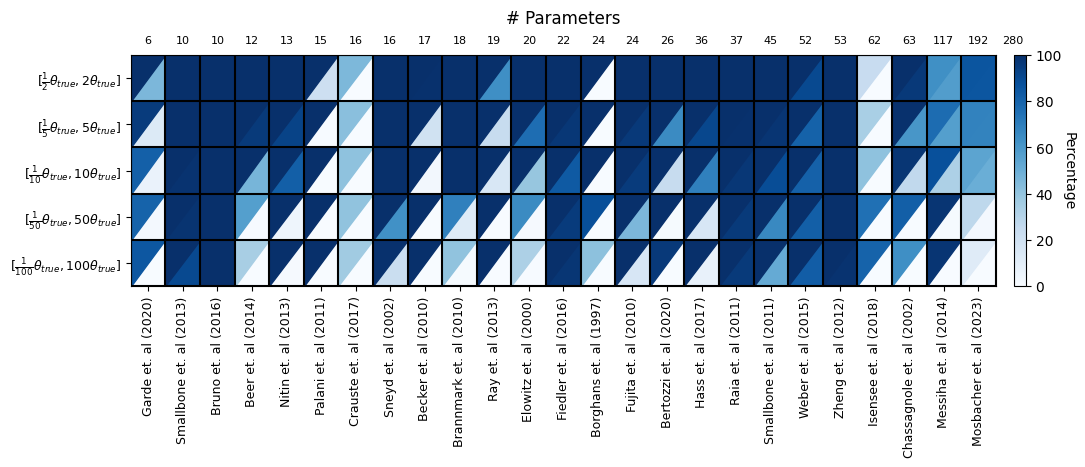

In [37]:


# Sample data
data1 = np.array(heatmap_array_init)  # Replace with your first dataset
data2 = np.array(heatmap_array_succes)  # Replace with your second dataset

# Normalize the data
data1_normalized = data1 / 100
data2_normalized = data2 / 100

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 3))

# Define the size of the grid
nrows, ncols = data1.shape

# Loop over data dimensions and create lower and upper triangles
for i in range(nrows):
    for j in range(ncols):
        # Coordinates of the corners of the cell
        x = j
        y = nrows - i - 1

        # Values from the datasets (already normalized)
        value1 = data1_normalized[i, j]
        value2 = data2_normalized[i, j]

        # Define the colors based on the normalized values in greyscale
        color1 = plt.cm.Blues(value2)  # Lower triangle uses dataset1 value
        color2 = plt.cm.Blues(value1)  # Upper triangle uses dataset2 value

        # Draw lower left triangle (dataset1)

        upper_left_triangle = patches.Polygon([(x, y), (x + 1, y), (x + 1, y + 1)], color=color1)
        ax.add_patch(upper_left_triangle)

        # Draw lower right triangle (dataset2)
        lower_right_triangle = patches.Polygon([(x, y), (x, y + 1), (x + 1, y + 1)], color=color2)
        ax.add_patch(lower_right_triangle)

# Draw grid lines between each column and row
for i in range(ncols + 1):
    # Vertical grid lines
    ax.plot([i, i], [0, nrows], color="black", linewidth=1.5)

for i in range(nrows + 1):
    # Horizontal grid lines
    ax.plot([0, ncols], [i, i], color="black", linewidth=1.5)


# Set the axis limits to match the grid size
ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)

# Define y-tick labels
y_labels = [
    r"[$\frac{1}{2}\theta_{true}, 2\theta_{true}]$",
    r"[$\frac{1}{5}\theta_{true}, 5\theta_{true}]$",
    r"[$\frac{1}{10}\theta_{true}, 10\theta_{true}]$",
    r"[$\frac{1}{50}\theta_{true}, 50\theta_{true}]$",
    r"[$\frac{1}{100}\theta_{true}, 100\theta_{true}]$",
]

# Set y-tick positions and corresponding labels
ax.set_yticks([4.5, 3.5, 2.5, 1.5, 0.5], y_labels, fontsize=9)

# Define x-tick labels
x_labels = [literature_names[model_name] for model_name in heatmap_array_init.columns]
ax.set_xticks(np.arange(0, 25, 1) + 0.5, x_labels, rotation=90, fontsize=9)

# Add parameter numbers at the top of each column
for j, param_num in enumerate(sorted_params):
    ax.text(j + 0.5, nrows + 0.2, str(param_num), ha="center", va="bottom", fontsize=8)

# Add a label for '# Parameters' above the heatmap
n_params = len(sorted_params)
ax.text(n_params / 2 - 0.5, nrows + 0.6, "# Parameters", ha="center", va="bottom", fontsize=12, color="black")

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=100))
sm.set_array([])  # Dummy mappable for the colorbar
cbar = plt.colorbar(sm, ax=ax, fraction=0.05, pad=0.02)
cbar.set_label("Percentage", rotation=270, labelpad=10)

# Show the plot
plt.show()

# fig.savefig("figures/heatmaps_exp1/1209_training_success_heatmap_merged.png", bbox_inches="tight")
# fig.savefig("figures/heatmaps_exp1/1209_training_success_heatmap_merged.svg", bbox_inches="tight")

In [25]:
data2_normalized

array([[0.46      , 1.        , 1.        , 1.        , 1.        ,
        0.21666667, 0.        , 1.        , 0.99333333, 1.        ,
        0.63666667, 1.        , 1.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.90333333,
        1.        , 0.        , 0.96333333, 0.57666667, 0.85333333],
       [0.13666667, 0.99666667, 1.        , 0.96      , 0.92666667,
        0.00666667, 0.        , 1.        , 0.19666667, 1.        ,
        0.24333333, 0.76333333, 0.97      , 0.        , 0.96333333,
        0.65      , 0.91333333, 0.99333333, 0.98      , 0.80666667,
        1.        , 0.        , 0.60666667, 0.56666667, 0.68333333],
       [0.07      , 0.98666667, 1.        , 0.47      , 0.81666667,
        0.        , 0.        , 1.        , 0.03      , 1.        ,
        0.15666667, 0.39333333, 0.83666667, 0.        , 0.95333333,
        0.24333333, 0.69333333, 0.97      , 0.89      , 0.81      ,
        1.        , 0.        , 0.26666667, 0.